<div class="alert alert-success">
    <h1>Assignment 1: Deep Learning</h1>
    <h3 align='center'>Computational Intelligence (4032-01)</h3>
    <h5 align='center'>Instructor: Dr.Samane Hosseini</h5>
    <h5 align='center'>TA: Arash Azhand</h5>
</div>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# 1. Generate Dataset

In [ ]:
def load_moons_dataset():
    # TODO: Generate a dataset with make_moons (2000 samples, noise=0.3, random_state=42)
    
    # HINT:
    # 1. Use make_moons from sklearn.datasets.
    # 2. Convert X, y into PyTorch tensors of type torch.float32.

    pass  # Replace this with actual implementation
    
    return X, y

In [ ]:
X, y = load_moons_dataset()

plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.Spectral)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Two-Class Dataset")
plt.show()

**Desired Output:**

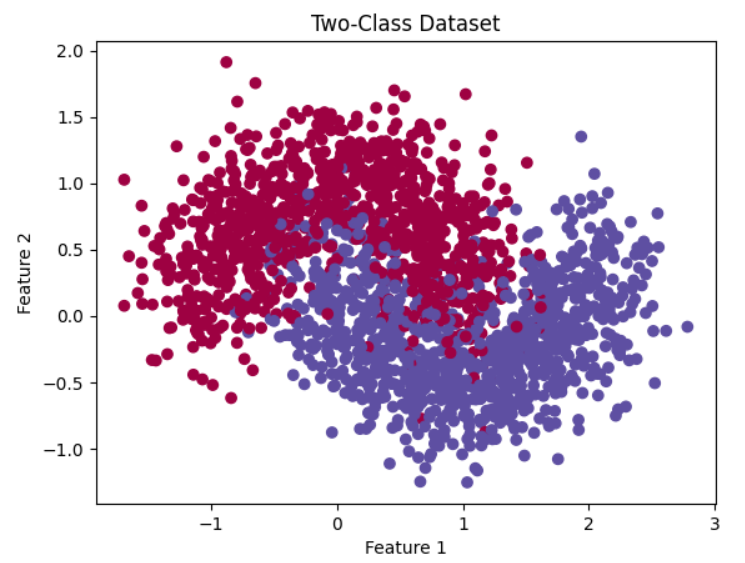

# 2. Define Networks

In [ ]:
# Define an underfitting model with one hidden layer and too few neurons (3 or 5)
class UnderfitNeuralNet(nn.Module):
    def __init__(self, input_dim):
        super(UnderfitNeuralNet, self).__init__()
        # TODO: Define a small neural network with just one hidden layer
        
        # HINT:
        # 1. First layer: input_dim → 3 neurons 
        # 2. Output layer: 3 neurons → 1 neuron 
        
        pass  # Replace this with actual layers

    def forward(self, x):
        # TODO: Implement forward pass using ReLU and Sigmoid
        
        # HINT:
        # 1. Apply ReLU on the first layer.
        # 2. Apply Sigmoid on the final output layer.

        pass  # Replace this with actual forward pass

        return x

In [ ]:
# Define an overfitting model with more than 4 layers and too many neurons in each layer eg:(128, 64, 32)
class OverfitNeuralNet(nn.Module):
    def __init__(self, input_dim):
        super(OverfitNeuralNet, self).__init__()
        # TODO: Define a deep neural network with multiple layers
        
        # HINT:
        # 1. First hidden layer: input_dim → 128 neurons 
        # 2. Second hidden layer: 128 → 64 neurons 
        # 3. Third hidden layer: 64 → 32 neurons 
        # 3. Fourth hidden layer: 32 → 16 neurons
        # 4. Output layer: 16 → 1 neuron 

        pass  # Replace this with actual layers

    def forward(self, x):
        # TODO: Implement forward pass using ReLU and Sigmoid
        
        # HINT:
        # 1. Apply ReLU on all hidden layers.
        # 2. Apply Sigmoid on the final output layer.

        pass  # Replace this with actual forward pass
        
        return x

# 3. Move data and models to CUDA (faster training with GPU)

In [ ]:
# Ensure CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device}")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=86)

# TODO: Move data to CUDA 

# HINT:
# 1. Use `.to(device)` to move X_train, X_test, y_train, y_test to the same device.

# Example: X_train = X_train.to(device)

pass  # Replace this with actual implementation

In [ ]:
# TODO: Move the instances of models to the specified device (GPU)
# Hint: You have already defined 'device' earlier.
# Use the `.to(device)` method to move both the underfit and overfit models to the same device as the data.
# Example:
# model = YourModelClass(...).to(device)

In [ ]:
# You can see a summary of yor model along with the number of parameters it has
%pip install torchsummary # !pip install torchsummary --> run this in google colab
from torchsummary import summary
print("Simple Model Summary:")
summary(simple_model, input_size=(2,))
print("Complex Model Summary:")
summary(complex_model, input_size=(2,))

Desired Output:

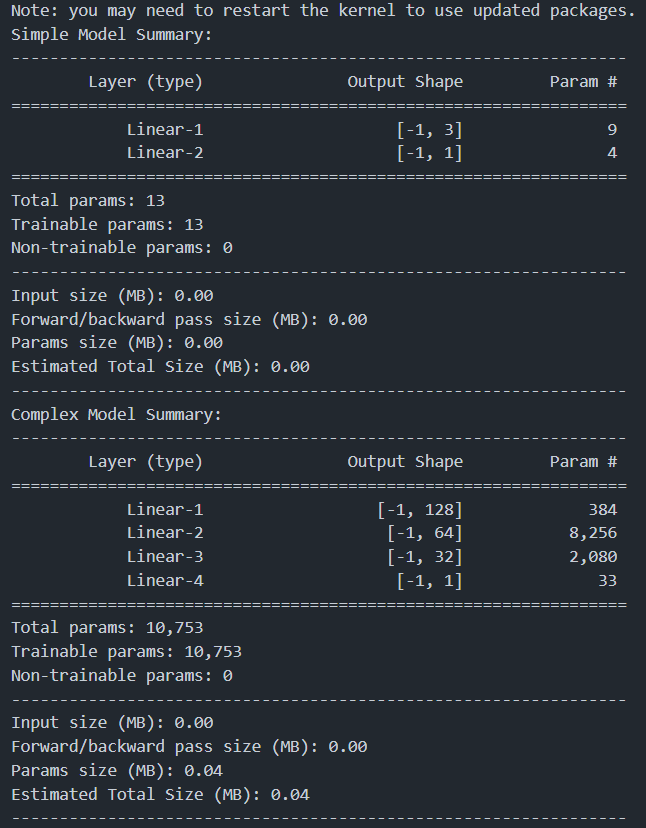

# 4. Train 

In [ ]:
def train(model, X_train, y_train, num_epochs=1000, batch_size=32, lr=0.01, lambda_reg=0.01, regularization_type=None):
    # TODO: Ensure the model is in training mode
    # This is necessary because some layers (like dropout or batch normalization) behave differently in training vs. evaluation mode.
    
    # TODO: Define the loss function
    # Hint: We are using Binary Cross Entropy (BCE) since this is a binary classification problem.

    # TODO: Define the optimizer
    # Hint: Adam is used here, but you could experiment with other optimizers like SGD or RMSprop.

    dataset = TensorDataset(X_train, y_train)  
    # TensorDataset helps us manage input (X) and target (y) pairs in batches.

    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)  
    # DataLoader splits the dataset into batches and shuffles them for better training performance.

    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)  

            # TODO: Reset the gradients before backpropagation
            # Hint: PyTorch accumulates gradients by default, so we need to clear them at the start of each batch.

            # TODO: Perform forward pass
            # Hint: Pass the input through the model to get predictions.

            # TODO: Compute the loss
            # Hint: Make sure the shapes match. if didn't match, you can use outputs.squeeze() which ensures it's the same shape as targets.

            # TODO: Implement L1 regularization if selected
            if regularization_type == "L1":
                # Hint: L1 regularization adds the absolute value of the weights to the loss.
                # you can access the model parameters with `model.parameters()`
                pass  # Replace 'pass' with your implementation

            # TODO: Implement L2 regularization if selected
            elif regularization_type == "L2":
                # Hint: L2 regularization adds the squared value of the weights to the loss.
                # you can access the model parameters with `model.parameters()`
                pass  # Replace 'pass' with your implementation

            # TODO: Compute gradients using backpropagation
            # Hint: This step calculates how each weight should be updated.

            # TODO: Update model parameters
            # Hint: This applies the calculated gradients to update the model weights.

            running_loss += loss.item() * inputs.size(0)

        if epoch % 100 == 0:    
            print(f"epoch {epoch}, loss: {running_loss}")  

    return model  

In [ ]:
# NOTE: Do not make any changes here
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 100), torch.linspace(y_min, y_max, 100))
    xx, yy = xx.to(device), yy.to(device)
    
    with torch.no_grad():
        Z = model(torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)).cpu()
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx.cpu().numpy(), yy.cpu().numpy(), Z.numpy(), levels=[0, 0.5, 1], alpha=0.6)
    plt.scatter(X.cpu()[:, 0], X.cpu()[:, 1], c=y.cpu().numpy().flatten(), edgecolor='k')
    plt.title(title)
    plt.show()

# 5. Train Models with Different Configurations and Analyze Their Effects

### Experiment 1: Train the Models Without Regularization  (This is done for you)
- **Train both `UnderfitNeuralNet` and `OverfitNeuralNet` models without any regularization.**  
- **Hint:** Use the existing training function and evaluate their performance. Observe if the overfit model memorizes the training data.  

### Experiment 2: Apply L1 Regularization  
- **Modify the training to include L1 regularization.**  
- **Hint:** Add an L1 penalty term (`lambda_reg * sum(abs(param))`) to the loss function.  
- **Analyze:** Does it improve generalization? Do model weights become sparse?  

### Experiment 3: Apply L2 Regularization  
- **Modify the training function to include L2 regularization.**  
- **Hint:** Add an L2 penalty term (`lambda_reg * sum(param^2)`) to the loss function.  
- **Analyze:** Does it help reduce overfitting? Compare with the L1 model.  

### Experiment 4: Add Batch Normalization (for Overfitted Model)  
- **Modify the `OverfitNeuralNet` to include Batch Normalization layers. You can add more layers too.**  
- **Hint:** Use `nn.BatchNorm1d()` after fully connected layers.  
- **Analyze:** Does it stabilize training and improve performance?  

### Experiment 5: Add Dropout (for Overfitted Model) (EXTRA POINT)
- **Modify the `OverfitNeuralNet` to include Dropout layers.**  
- **Hint:** Use `nn.Dropout(p=0.5)` before activation functions.  
- **Analyze:** Does it help prevent overfitting? Compare decision boundaries.  

### Final Step: Compare and Interpret the Results  
- **Evaluate accuracy on test data for each experiment.**  
- **Plot the decision boundary for each model using the provided function.**  
- **Compare and discuss:**  
  - Which regularization method improved generalization the most?  
  - Did dropout or batch normalization help the overfitted model?  
  - How do underfitting and overfitting look in the plots?  

**Your goal:** Experiment, analyze, and understand how these techniques impact deep learning models!

In [ ]:
print("Training too simple model without regularization...")
model_underfit = train(simple_model, X_train, y_train, regularization_type=None)
print("Training complicated model without regularization...")
model_overfit = train(complicated_model, X_train, y_train, regularization_type=None)

In [ ]:
plot_decision_boundary(X_train, y_train, model_underfit, title="Underfitted Model")
plot_decision_boundary(X_train, y_train, model_overfit, title="Overfitted Model")

In [ ]:
# Function to evaluate the model on test data
def evaluate_model(model, X_test, y_test, criterion):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        outputs = model(X_test).squeeze()
        loss = criterion(outputs, y_test.squeeze())
        predictions = (outputs > 0.5).float()  # Convert logits to binary labels
        accuracy = (predictions == y_test).float().mean()
    
    print(f"Test Loss: {loss.item():.4f}, Test Accuracy: {accuracy.item() * 100:.2f}%")
    return loss.item(), accuracy.item()

In [ ]:
# Evaluate on Test Data
evaluate_model(model_overfit, X_test, y_test, nn.BCELoss())
evaluate_model(model_underfit, X_test, y_test, nn.BCELoss())

# Plot decision boundaries for test data
plot_decision_boundary(X_test, y_test, model_underfit, title="Underfitted Model on Test Data")
plot_decision_boundary(X_test, y_test, model_overfit, title="Overfitted Model on Test Data")